# Big Data Mart Sales Problem

## Problem Statement:

##### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

##### Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

##### The dataset includes two files:

##### - bigdatamart_Train.csv: Use this file for the model building purpose. 

##### - bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

## Import Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Analysing DAtaFrame

In [4]:
df.shape

(8523, 12)

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
common_value = 'Medium'
df['Outlet_Size'] = df['Outlet_Size'].fillna(common_value)

#### Medium is the common value (Mode) so replacing the null values with common value

In [11]:
df['Outlet_Size'].isnull().sum()

0

#### Crosschecking for null values after replacement

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

#### Filling Null values in Item_Weight with mean value

In [13]:
df['Item_Weight'].isnull().sum()

0

#### Crosschecking for any null values after filling

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Checking null values for complete dataset

In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Analyzing the Statistical Data measurements like mean, std...,

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

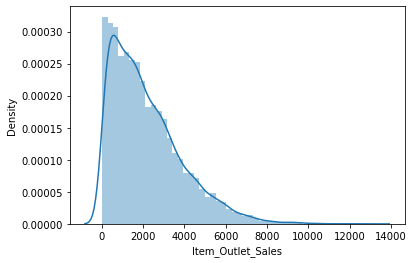

In [19]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

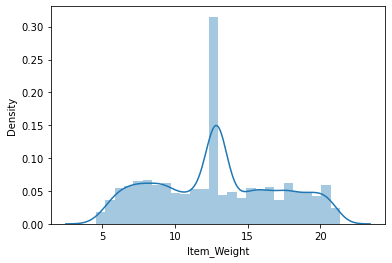

In [20]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

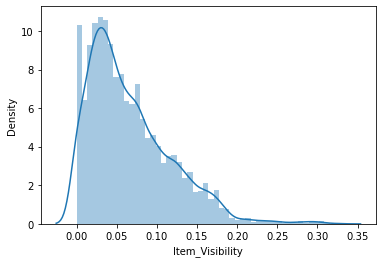

In [21]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

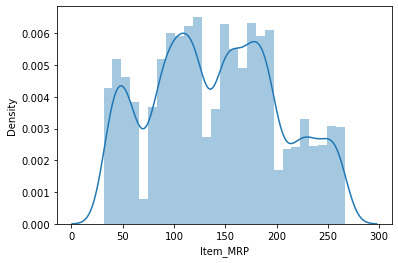

In [22]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

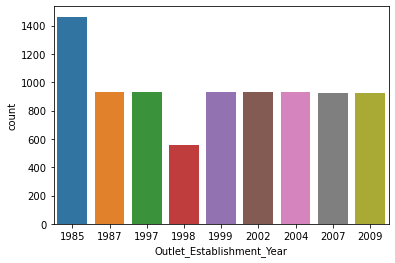

In [23]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

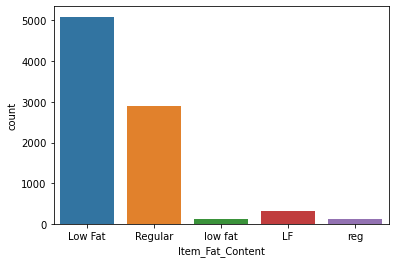

In [24]:
sns.countplot(df['Item_Fat_Content'])

In [25]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

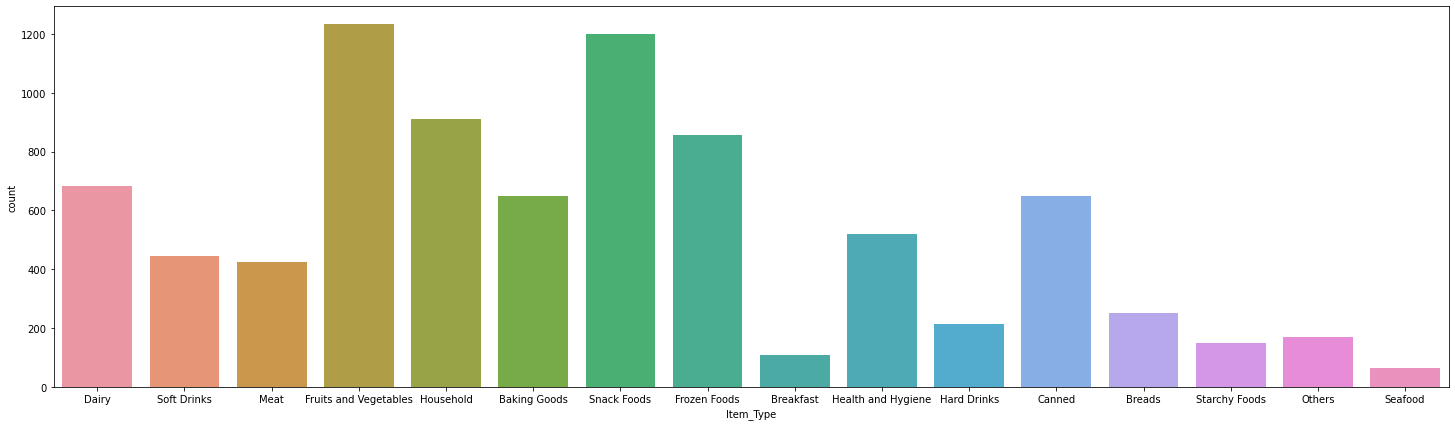

In [27]:
plt.figure(figsize=(25,7))
sns.countplot(df['Item_Type'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

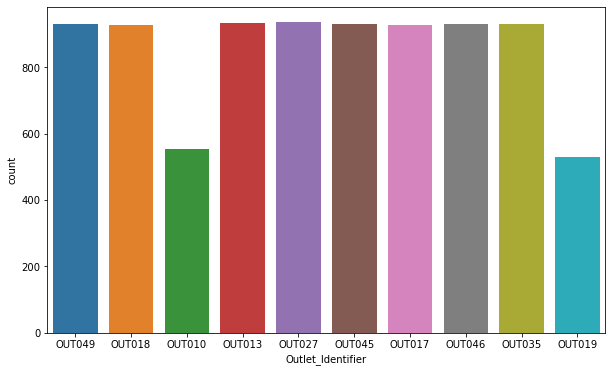

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

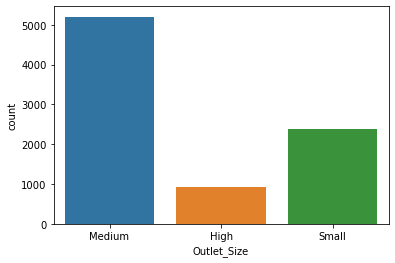

In [29]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

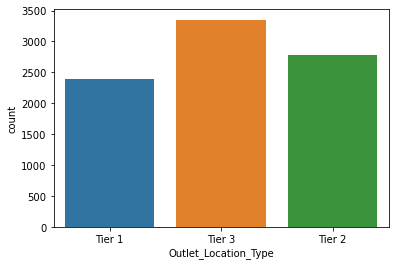

In [30]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

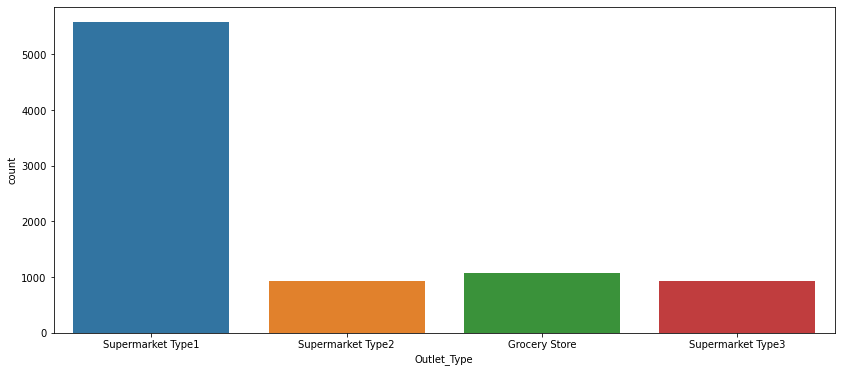

In [31]:
plt.figure(figsize=(14,6))
sns.countplot(df['Outlet_Type'])

In [32]:
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [34]:
corr_mat=df.corr()

In [35]:
corr_mat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


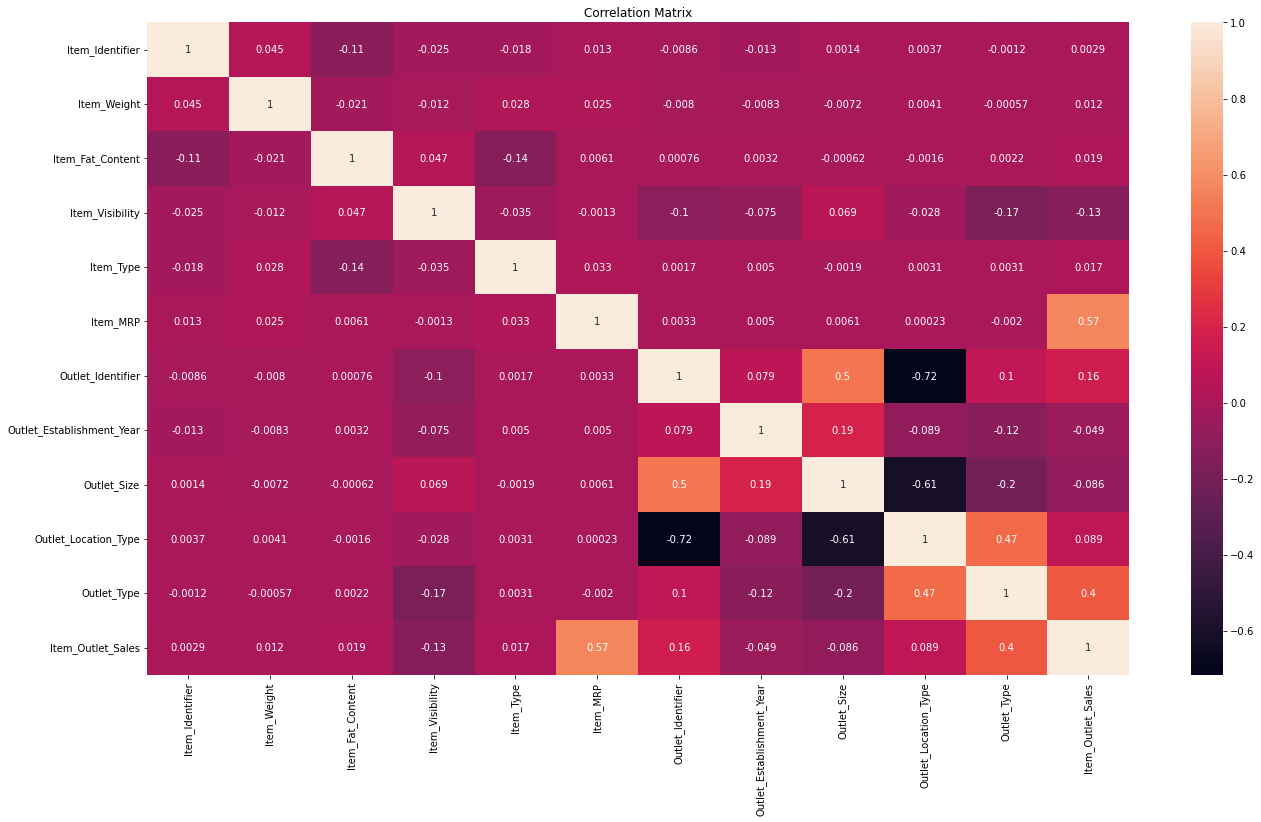

In [36]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

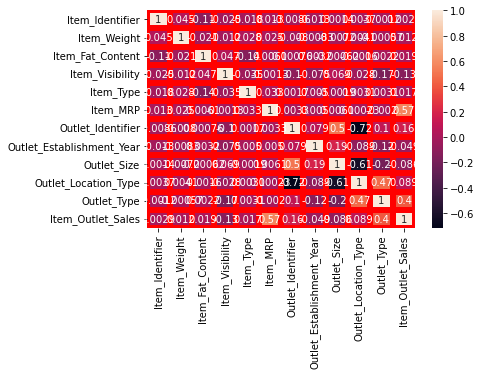

In [37]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')

In [38]:
corr_mat["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

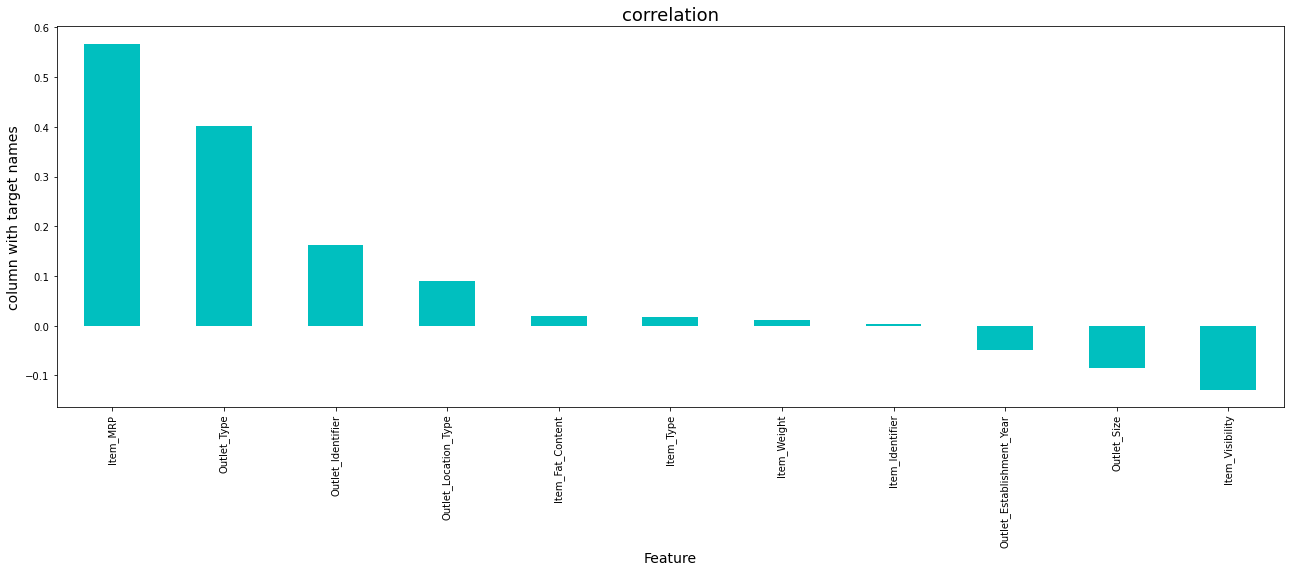

In [39]:
plt.figure(figsize=(22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [40]:
x=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

#### Separating Features and Target Variable

In [42]:
x.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

#### Checking for the Item_Fat_Content,Item_Visibility, Outlet_Type has skewness out of -0.5 to +0.5 range

In [43]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

#### Removing Skewness through Power Transforms

In [44]:
df_skew.skew()

Item_Identifier             -0.293700
Item_Weight                 -0.068024
Item_Fat_Content             0.616705
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

#### Checking Skewness after power transforms and found most of the columns skewness is within range of -0.5 to +0.5

In [45]:
df=df_skew

In [46]:
x=df_skew

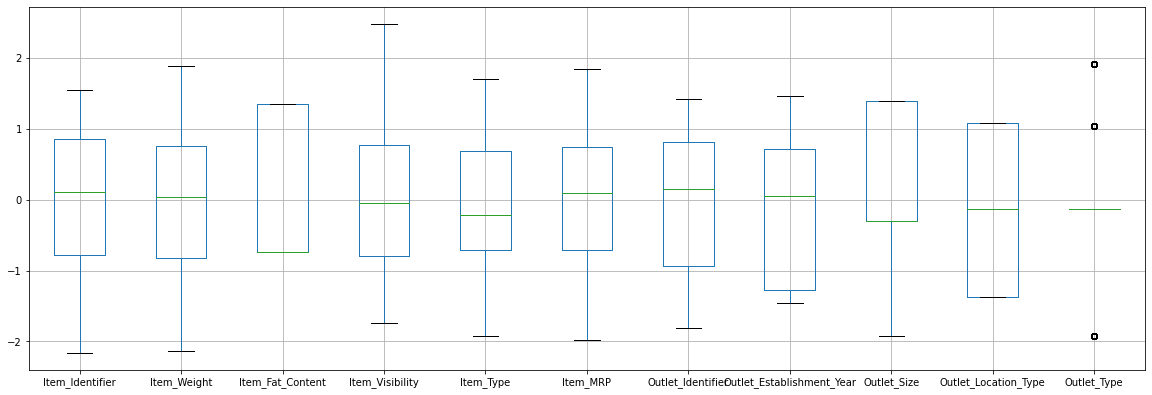

In [47]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### Checking for Outliers through box plot graphs and found almost no outliers

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df_skew))
df_outlier=df_skew[(z<3).all(axis=1)]

#### Using zscore, removing the outliers

In [49]:
df_outlier.shape

(8523, 11)

In [50]:
df.shape

(8523, 11)

In [51]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-1.46103862, -0.82263635, -0.73814723, ..., -0.29329517,
        -1.37384276, -0.12348771],
       [-2.09385818, -1.73380133,  1.35474328, ..., -0.29329517,
         1.08832445,  1.04059102],
       [-0.15401841,  1.08636176, -0.73814723, ..., -0.29329517,
        -1.37384276, -0.12348771],
       ...,
       [ 1.20607271, -0.49655592, -0.73814723, ...,  1.390694  ,
        -0.13111325, -0.12348771],
       [-0.11255898, -1.37344321,  1.35474328, ..., -0.29329517,
         1.08832445,  1.04059102],
       [-1.86245653,  0.49178563, -0.73814723, ...,  1.390694  ,
        -1.37384276, -0.12348771]])

In [52]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

#### Regression Model Building:

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=140)

#### Linear Regression Model Build:

In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.535296389792079
1270824.0843321949
1127.3083359632337


In [55]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.5210966544701426


#### Linear Regression Model Difference is 53.52 - 52.10 = 1.42

#### Ridge Regression Model Build:

In [57]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.5352935561804351
1270831.8334046006
1127.3117729379928


In [58]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.5210973003324486


#### Ridge Regression Model Difference is 53.52 - 52.10 = 1.42

#### Lasso Regression Model Build:

In [59]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.535448113477099
1270409.1658575984
1127.124290332525


In [60]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.5211354267689702


#### Lasso Regression Model Difference is 53.54 - 52.11 = 1.43

In [61]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.5664678460294503
1185579.5618882345
1088.843221904896


In [63]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.5514274685962564


#### Random Forest Regressor Model Difference is 56.54 - 55.20 = 1.34

#### Ridge Regression Model has the least difference in r2_score so it is the best model

In [64]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [65]:
GCV=GridSearchCV(Ridge(),parameters1,cv=5)

In [66]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [67]:
GCV.best_params_

{'alpha': 7.0, 'max_iter': 200, 'random_state': 700, 'solver': 'sag'}

#### Obtaining the Best Parameters for Hyper parameters tuning

In [68]:
mod1=Ridge(alpha=7.0,random_state=700,solver='sag',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

56.64678460294503
1185579.5618882345
1088.843221904896


#### Ridge Model r2_score after Hyper parameter Tuning is 56.54%

In [69]:
import joblib
joblib.dump(mod1,"Big_Data_Mart_Sales_Ridge.pkl")

['Big_Data_Mart_Sales_Ridge.pkl']

In [70]:
['Big_Data_Mart_Sales_Ridge.pkl']

['Big_Data_Mart_Sales_Ridge.pkl']